# CoronaVirus Plots

In [1]:
#pip install folium

In [2]:
import pandas as pd #Dataframe manipulation library
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib as mpl
import folium
import os
import random
import math #Math functions
import time
from matplotlib import style
import datetime
plt.style.use('bmh')
%matplotlib inline

In [3]:
###Import the data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [5]:
cols = confirmed_df.keys()

In [6]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [7]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [8]:
print("Number of Coronavirus confirmed cases : "+ str(confirmed_sum))
print("Number of Coronavirus active cases : "+ str(active_cases_sum))
print("Number of Coronavirus recovered cases : "+ str(recovered_sum))
print("Number of Coronavirus deaths cases : "+ str(death_sum))

Number of Coronavirus confirmed cases : 335955
Number of Coronavirus active cases : 223619
Number of Coronavirus recovered cases : 97704
Number of Coronavirus deaths cases : 14632


In [9]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [10]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [11]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

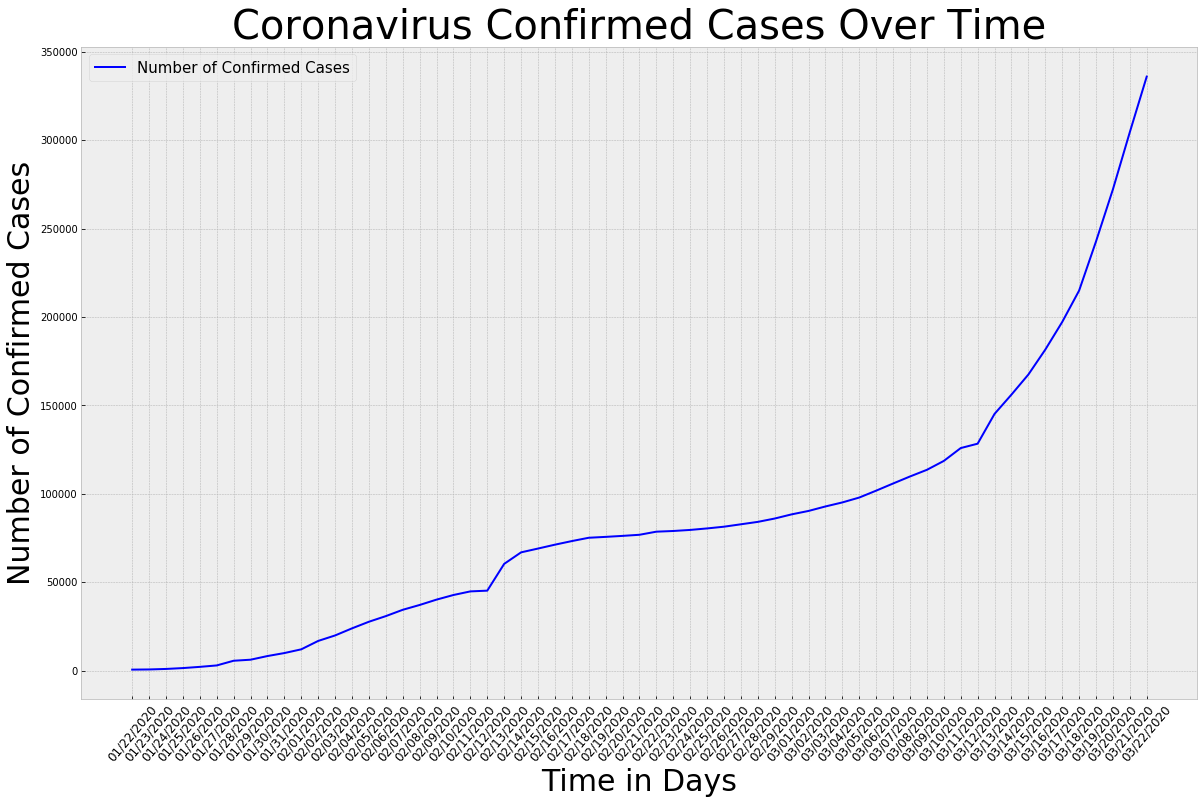

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='blue')
plt.legend(['Number of Confirmed Cases'])
plt.title('Coronavirus Confirmed Cases Over Time', size=40)
plt.legend(['Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

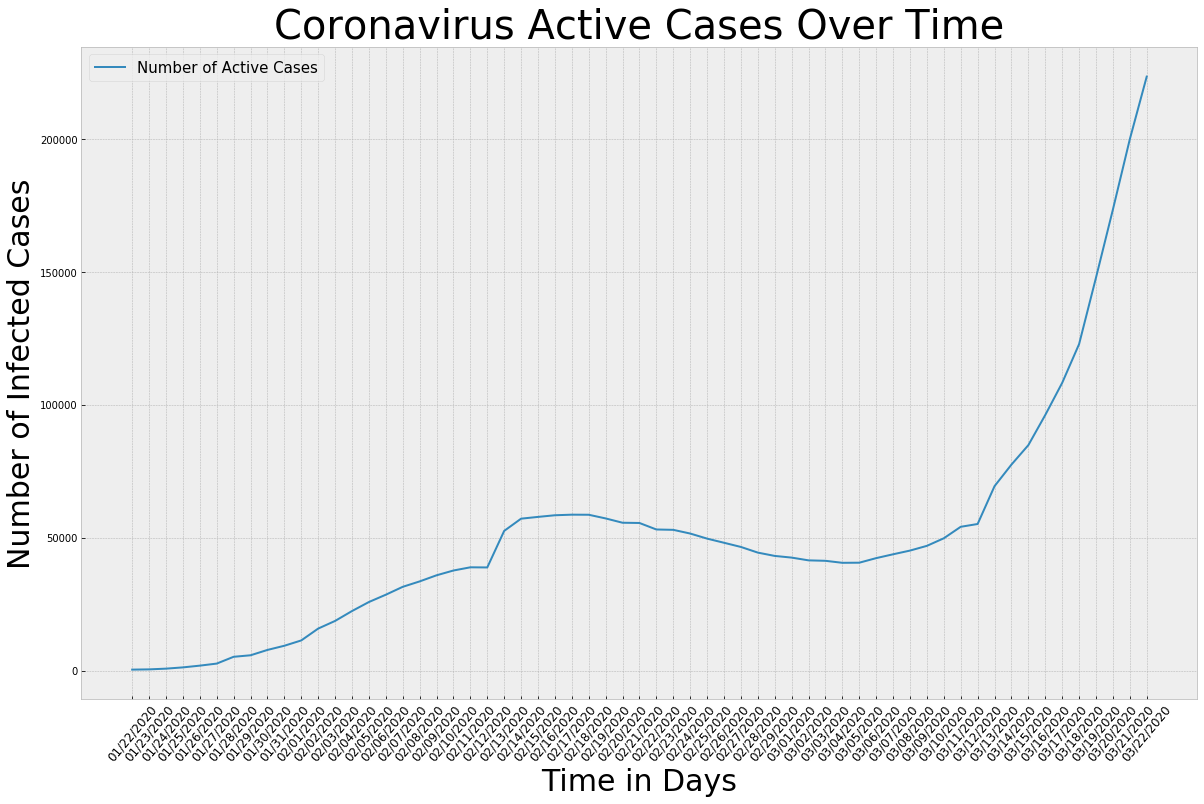

In [13]:
###Coronavirus Infected Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, active_cases)
plt.title('Coronavirus Active Cases Over Time', size=40)
plt.legend(['Number of Active Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Infected Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

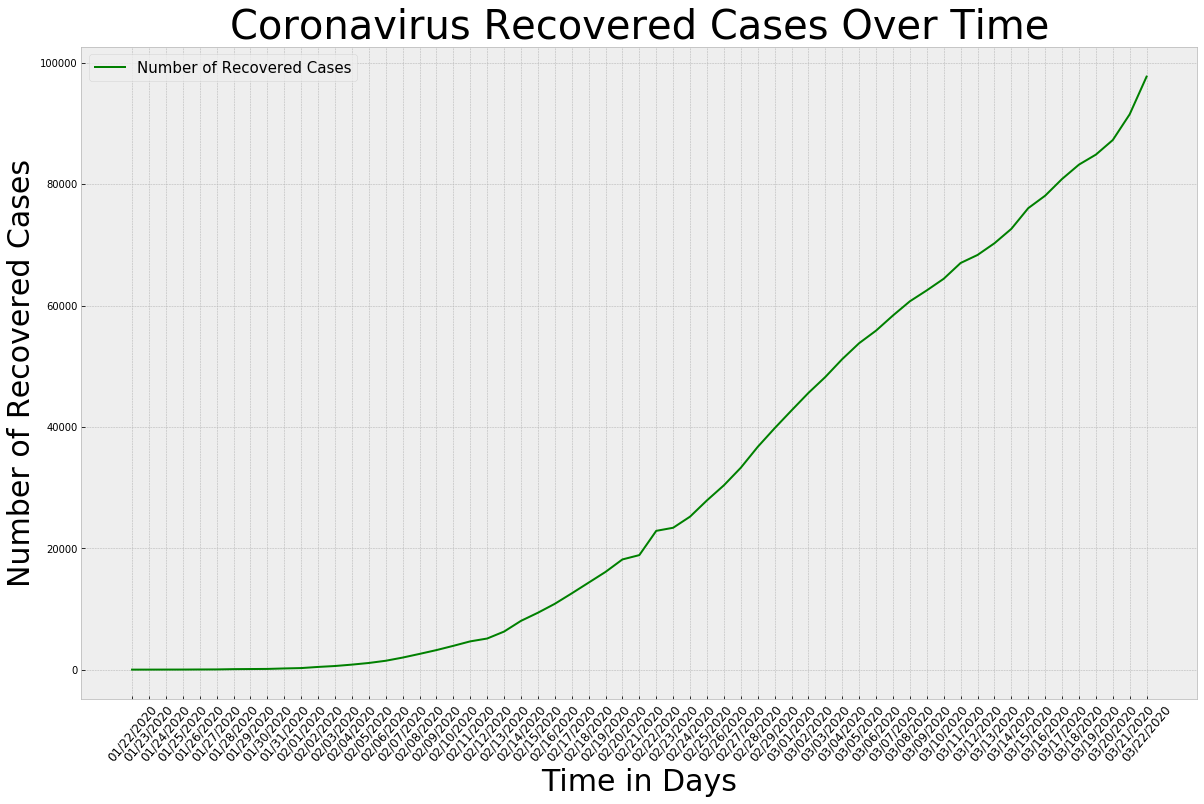

In [14]:
###Coronavirus Recovered Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Coronavirus Recovered Cases Over Time', size=40)
plt.legend(['Number of Recovered Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Recovered Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

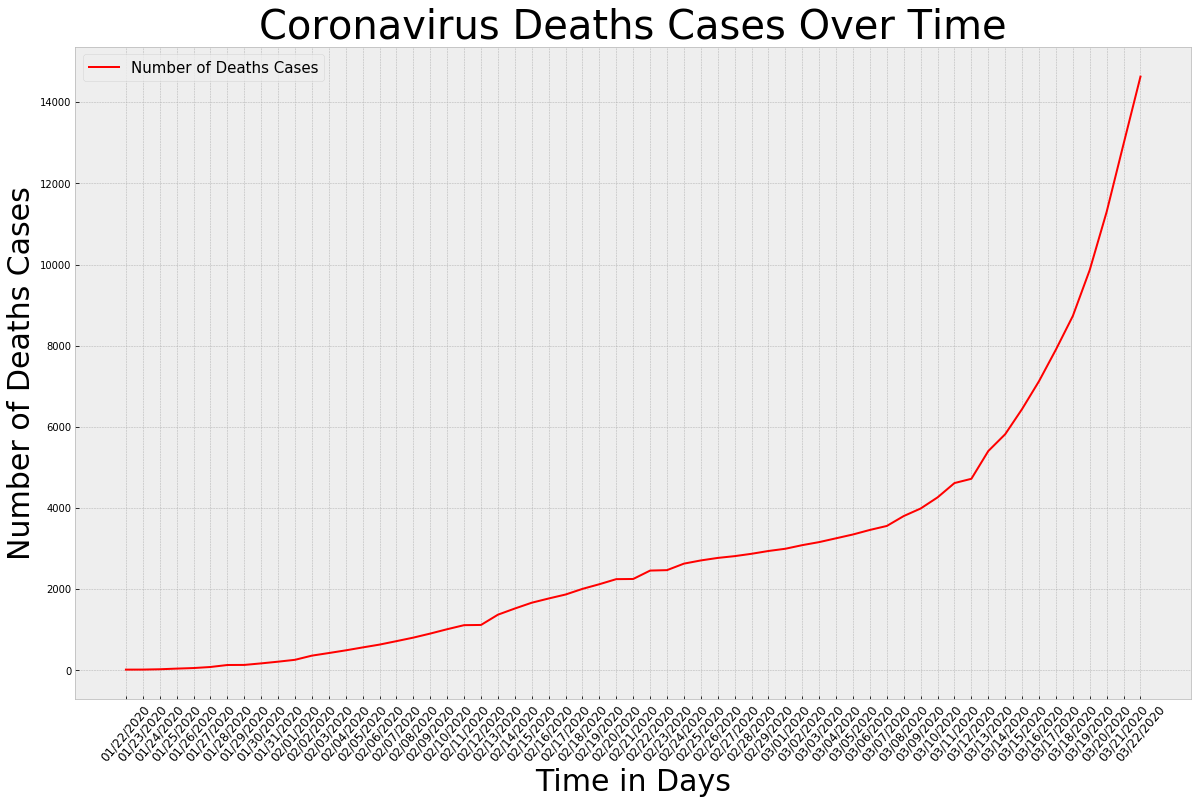

In [15]:
###Coronavirus Deaths Cases Over Tim
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Coronavirus Deaths Cases Over Time', size=40)
plt.legend(['Number of Deaths Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Deaths Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

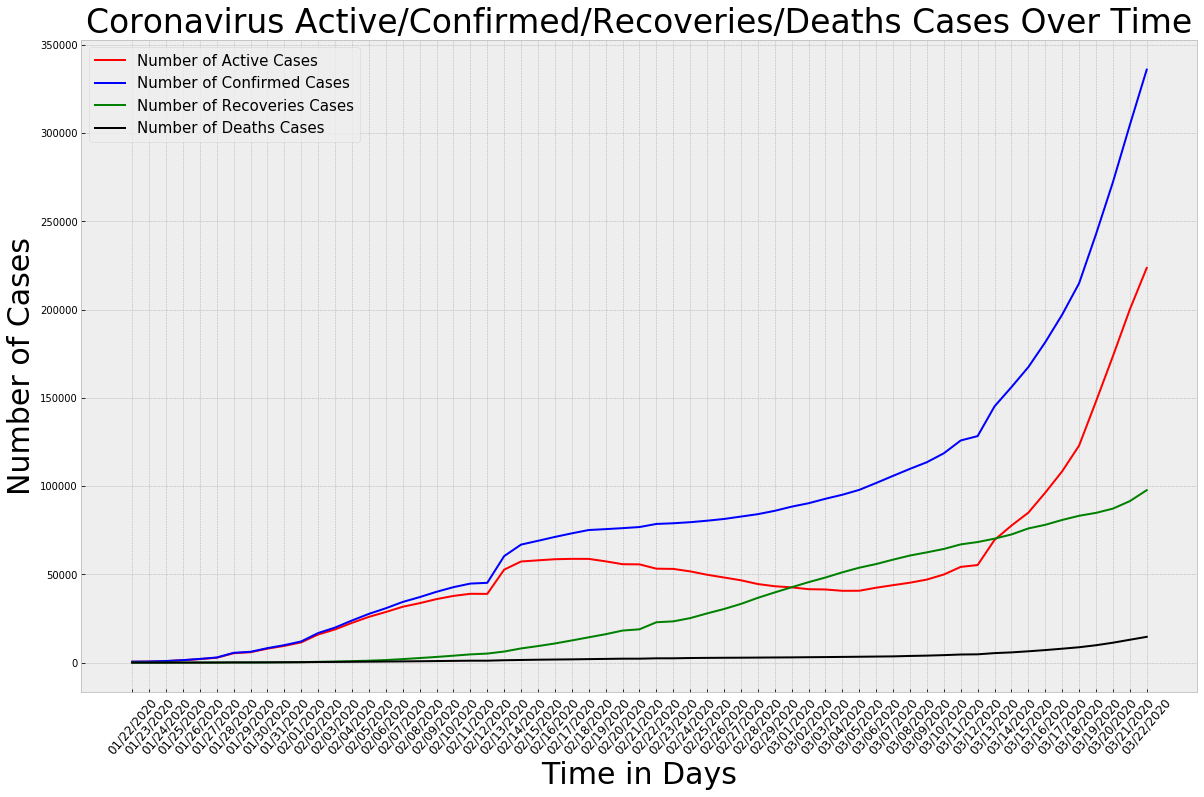

In [16]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, active_cases, color='red')
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.title('Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time', size=33)
plt.legend(['Number of Active Cases','Number of Confirmed Cases', 'Number of Recoveries Cases', 'Number of Deaths Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
mpl.style.use('ggplot') # optional: for ggplot-like style
plt.show()

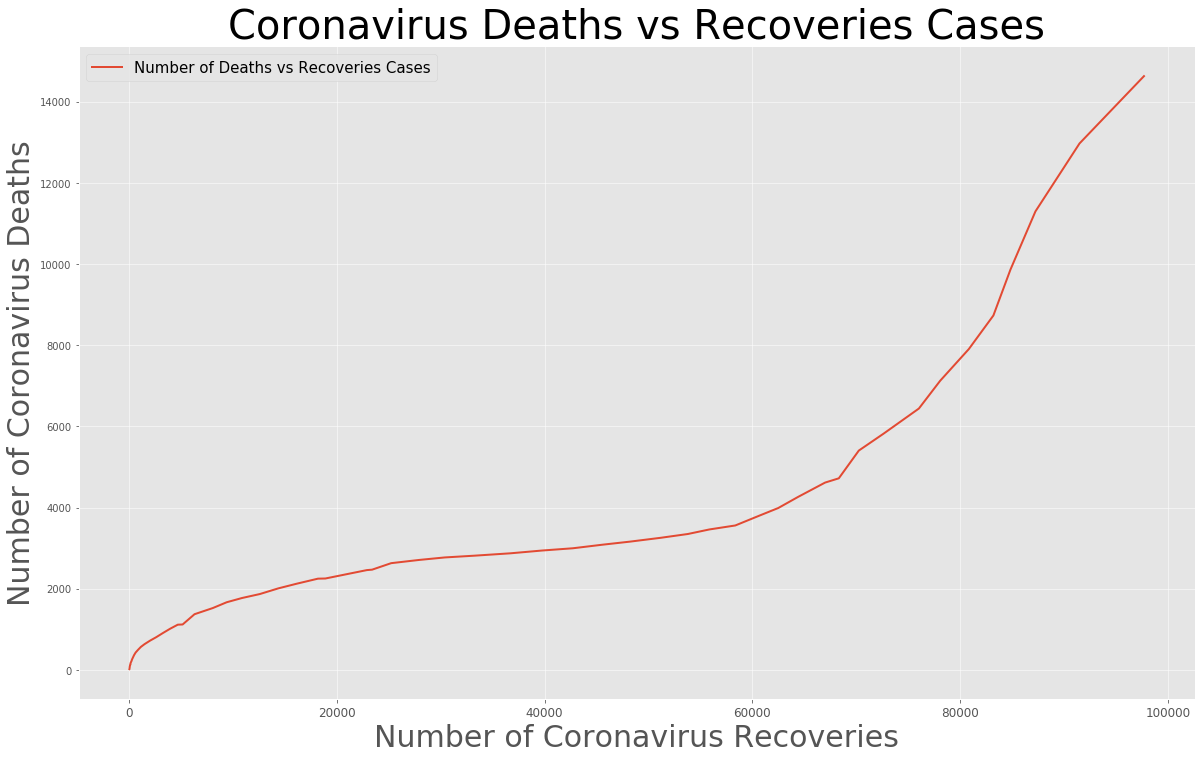

In [17]:
##number of deaths against the number of recoveries
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Recoveries Cases', size=40)
plt.legend(['Number of Deaths vs Recoveries Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=12)
plt.show()

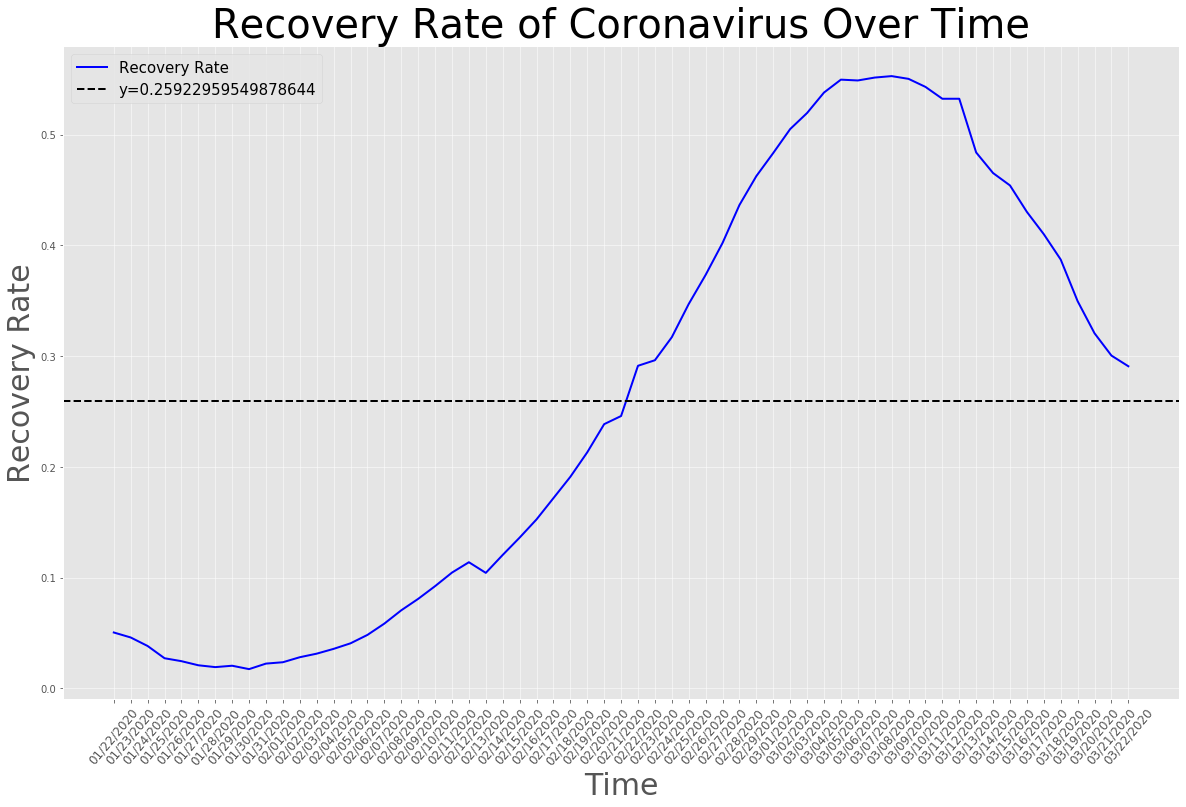

In [18]:
###Recovery Rate of Coronavirus Over Time
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=40)
plt.legend(['Recovery Rate', 'y='+str(mean_recovery_rate)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

In [19]:
print ("The Recovery Rate Percentage of Coronavirus is "+ str(mean_recovery_rate*100) )

The Recovery Rate Percentage of Coronavirus is 25.922959549878644


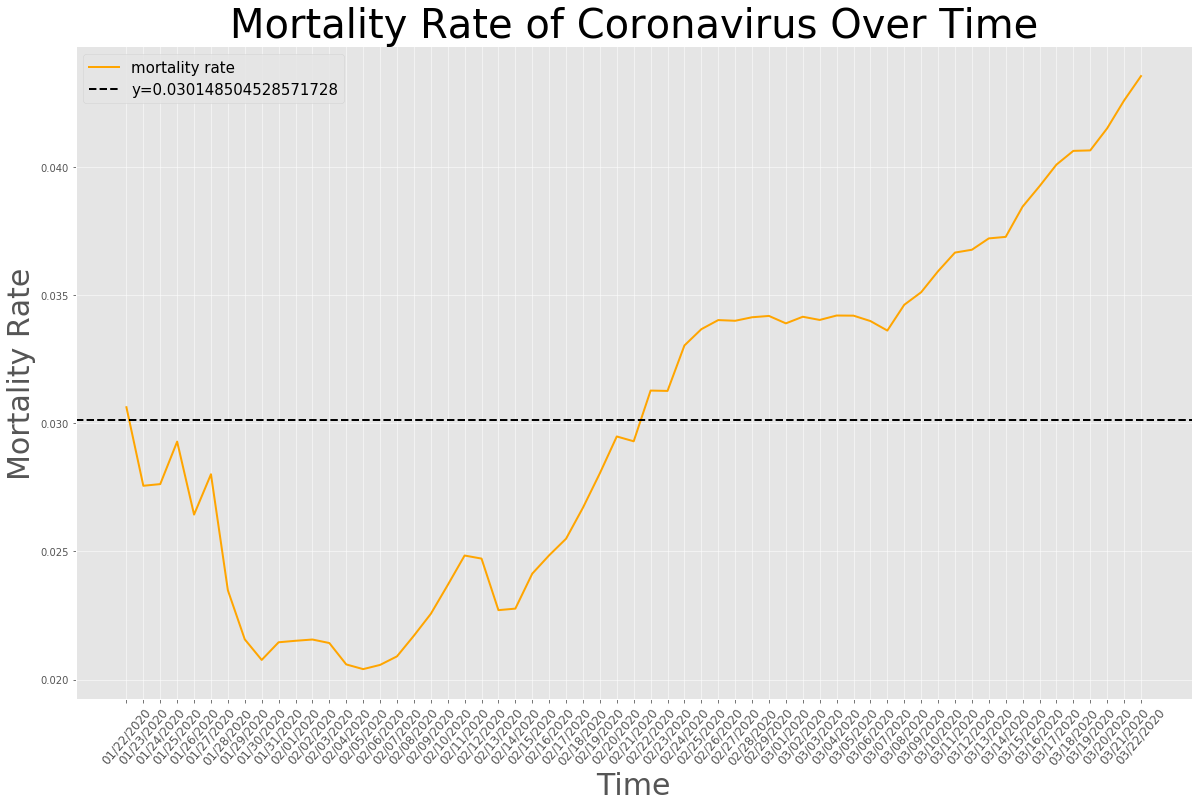

In [20]:
###Mortality Rate of Coronavirus Over Time
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=40)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

In [21]:
print("The Mortality Rate Percentage of Coronavirus is "+ str(mean_mortality_rate*100))

The Mortality Rate Percentage of Coronavirus is 3.0148504528571727


### Coronavirus Recovery & Mortality Rate Over Time

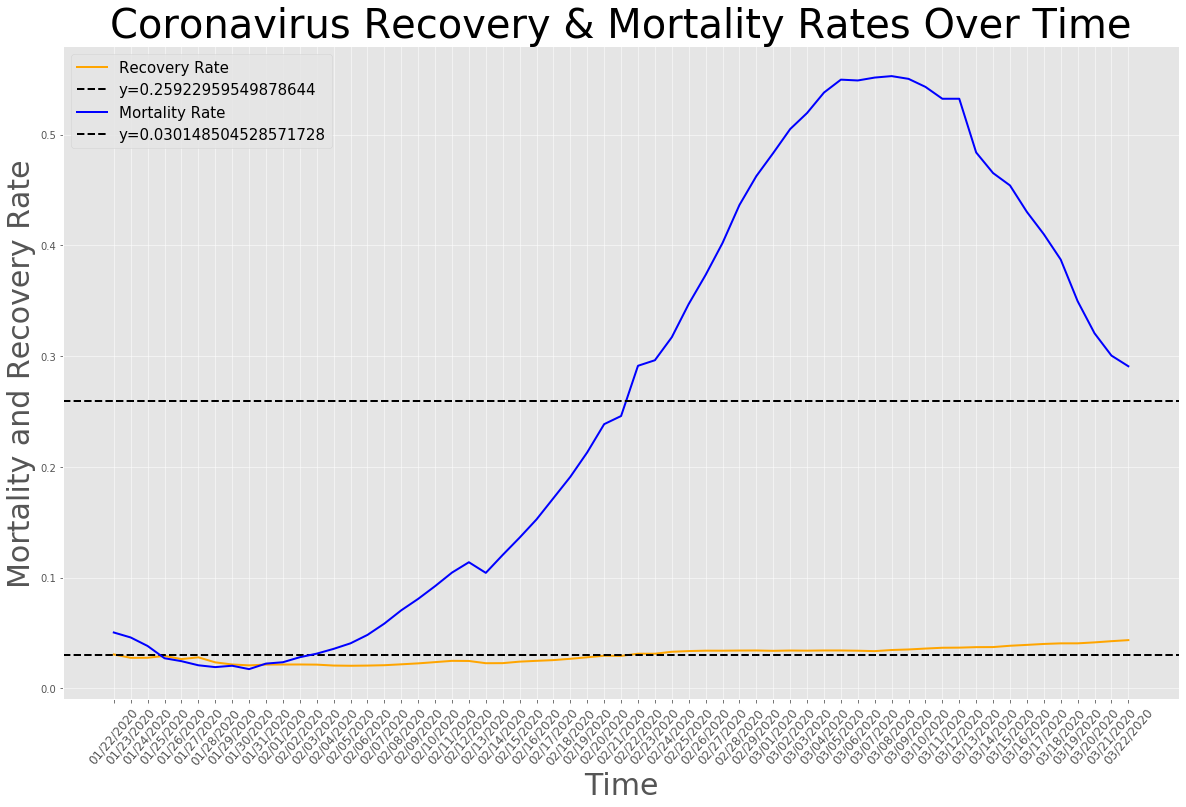

In [22]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Coronavirus Recovery & Mortality Rates Over Time', size=40)
plt.legend(['Recovery Rate', 'y='+str(mean_recovery_rate),'Mortality Rate', 'y='+str(mean_mortality_rate)], loc='upper left', fontsize=15)

plt.xlabel('Time', size=30)
plt.ylabel('Mortality and Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

# Predictions using Support-Vector Machine (SVM) and Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
###Future forecast
days_in_future = 30
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [25]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-30]

# Confirmed Cases

In [26]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 

In [27]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predC = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished


In [28]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predC = linear_model.predict(X_test_confirmed)
linear_predC = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_predC, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_predC, y_test_confirmed))

MAE: 107680.88398787483
MSE: 13898824720.584005


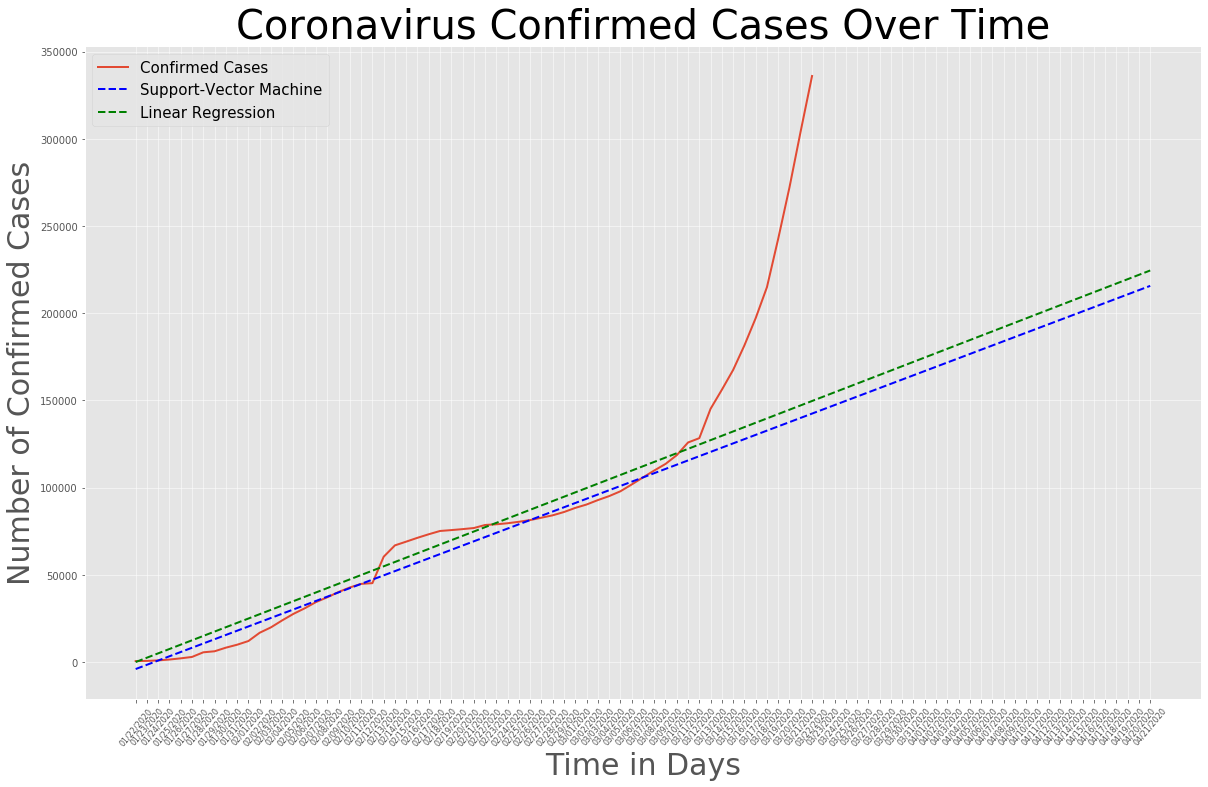

In [29]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_predC, linestyle='dashed', color='blue')
plt.plot(future_forcast_dates, linear_predC, linestyle='dashed', color='green')
plt.title('Coronavirus Confirmed Cases Over Time', size=40)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'Support-Vector Machine', 'Linear Regression'], loc='upper left', fontsize=15)
plt.xticks(rotation=50, size=8)
plt.show()

# Recovered Cases

In [30]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_recovered, test_size=0.1, shuffle=False) 

In [31]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predR = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [32]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predR = linear_model.predict(X_test_confirmed)
linear_predR = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_predR, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_predR, y_test_confirmed))

MAE: 26060.57083238869
MSE: 696337570.9755633


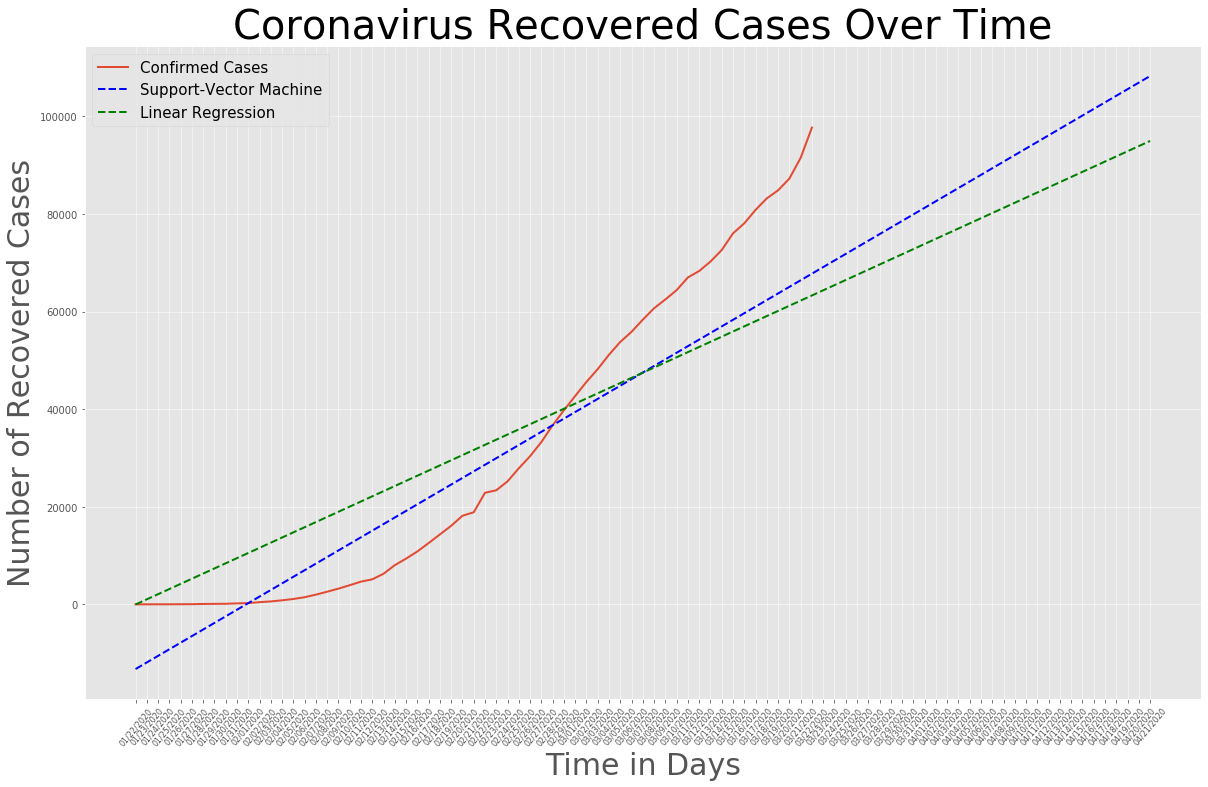

In [33]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered)
plt.plot(future_forcast_dates, svm_predR, linestyle='dashed', color='blue')
plt.plot(future_forcast_dates, linear_predR, linestyle='dashed', color='green')
plt.title('Coronavirus Recovered Cases Over Time', size=40)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Recovered Cases', size=30)
plt.legend(['Confirmed Cases', 'Support-Vector Machine', 'Linear Regression'], loc='upper left', fontsize=15)
plt.xticks(rotation=50, size=8)
plt.show()

# Deaths Cases

In [34]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False) 

In [35]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predD = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [36]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predD = linear_model.predict(X_test_confirmed)
linear_predD = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_predD, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_predD, y_test_confirmed))

MAE: 5611.577759864305
MSE: 37155403.987624444


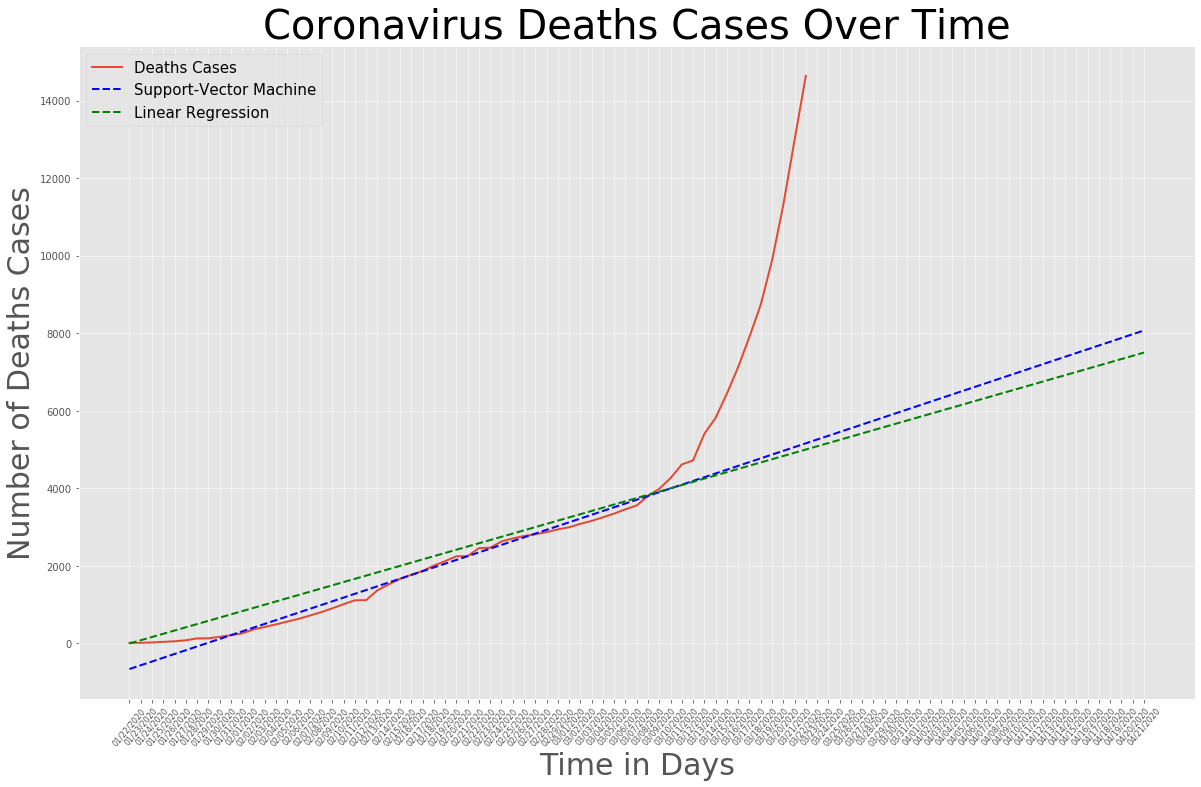

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths)
plt.plot(future_forcast_dates, svm_predD, linestyle='dashed', color='blue')
plt.plot(future_forcast_dates, linear_predD, linestyle='dashed', color='green')
plt.title('Coronavirus Deaths Cases Over Time', size=40)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Deaths Cases', size=30)
plt.legend(['Deaths Cases', 'Support-Vector Machine', 'Linear Regression'], loc='upper left', fontsize=15)
plt.xticks(rotation=50, size=8)
plt.show()

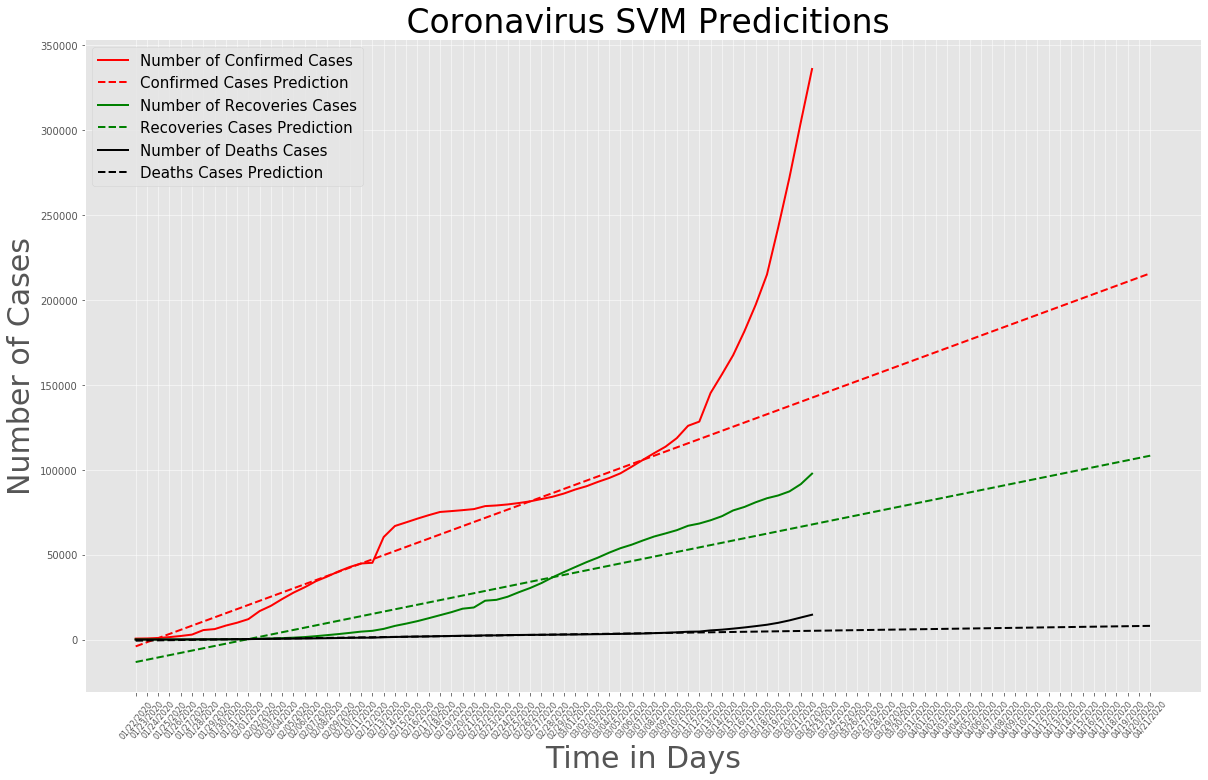

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, svm_predC, linestyle='dashed', color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, svm_predR, linestyle='dashed', color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.plot(future_forcast_dates, svm_predD, linestyle='dashed', color='black')
plt.title(' Coronavirus SVM Predicitions', size=33)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Prediction', 'Number of Recoveries Cases', 'Recoveries Cases Prediction', 'Number of Deaths Cases', 'Deaths Cases Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

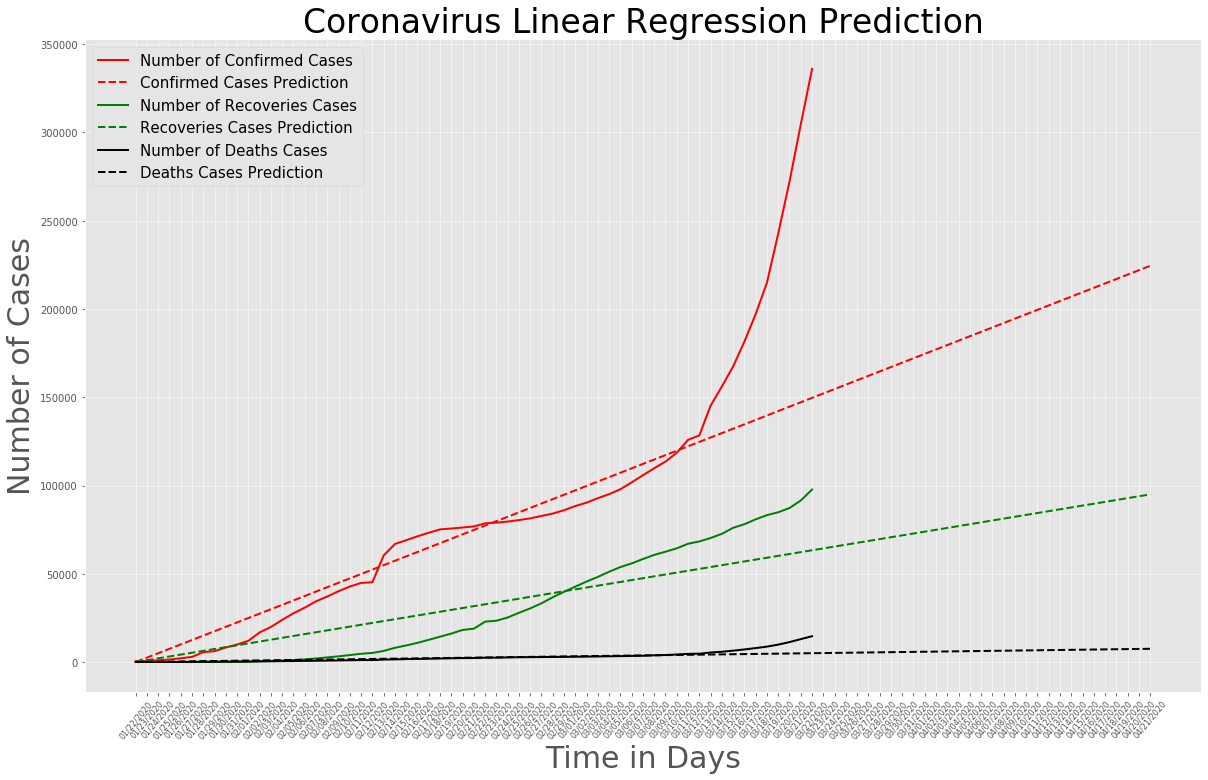

In [39]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, linear_predC, linestyle='dashed', color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, linear_predR, linestyle='dashed', color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.plot(future_forcast_dates, linear_predD, linestyle='dashed', color='black')
plt.title('Coronavirus Linear Regression Prediction', size=33)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Prediction', 'Number of Recoveries Cases', 'Recoveries Cases Prediction', 'Number of Deaths Cases', 'Deaths Cases Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

# CoronaVirus Map

In [40]:
def generateBaseMap(default_location=[20.693943, 3.985880], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [41]:
from folium.plugins import HeatMap
confirmed_df['count'] = 1
heat_map = generateBaseMap()
HeatMap(data=confirmed_df[['Lat', 'Long', 'count']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=8, max_zoom=7).add_to(heat_map)
heat_map